# <center> Lab 2.2 (Students' exams dataset)

## Imports and warning ignores

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

## File checking

In [3]:
path = '/Users/valerikanasha228/Downloads/StudentsPerformance.csv'
def check_file_path(path):
    res = True
    if not path.endswith('.csv'):
        print('ERROR: Wrong file extension (only .csv allowed)!')
        res = False
    if not os.path.exists(path):
        print('ERROR: file not found!')
        res = False
    else:
        if os.path.getsize(path) == 0:
            print('ERROR: file is empty!')
            res = False
    return res
            
def check_cell_values(data):
    res = True
    if data.isnull().values.any():
        print('Some cell values are empty!')
        res = False
    return res
        
is_file_correct = check_file_path(path)

## Reading a data

In [4]:
if not is_file_correct:
    print("ERROR: file can't be read")
else:
    data = pd.read_csv(path)
    is_cell_values_correct = check_cell_values(data)

# 1. Bar plot of average scores for each gender

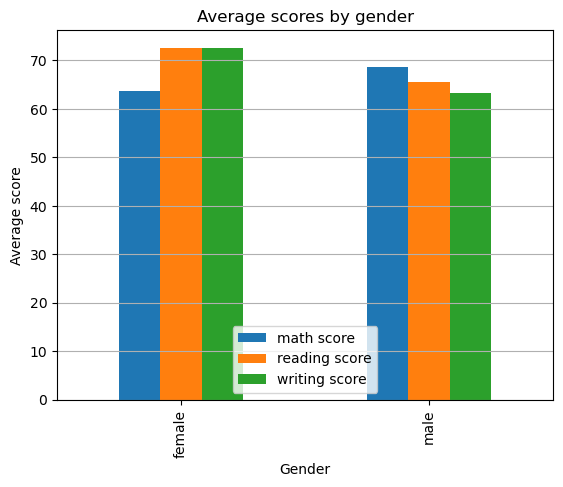

In [5]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    gender_scores = data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
    gender_scores.plot(kind='bar')
    plt.xlabel('Gender')
    plt.ylabel('Average score')
    plt.title('Average scores by gender')
    plt.grid(True, axis='y')
    plt.show()

### Вывод: у мальчиков средний балл по математике выше. Но у девочек выше средний балл по письму и чтению

# 2. Scatter plot between math and writing scores

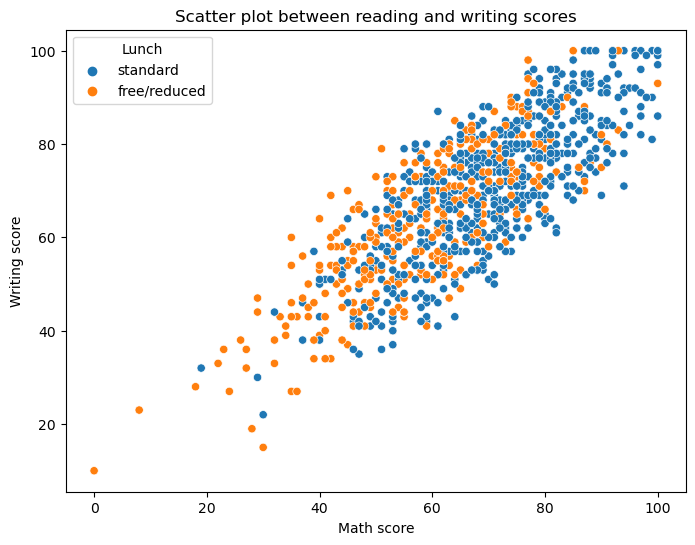

In [6]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x='math score', y='writing score', hue='lunch')
    plt.xlabel('Math score')
    plt.ylabel('Writing score')
    plt.title('Scatter plot between reading and writing scores')
    plt.legend(title='Lunch')
    plt.show()

### Вывод: студенты со стандартным ланчем чаще получают высокие оценки. ~Видимо, поэтому в бауманской столовке такие цены~

# 3. Pie plot of parents' education level

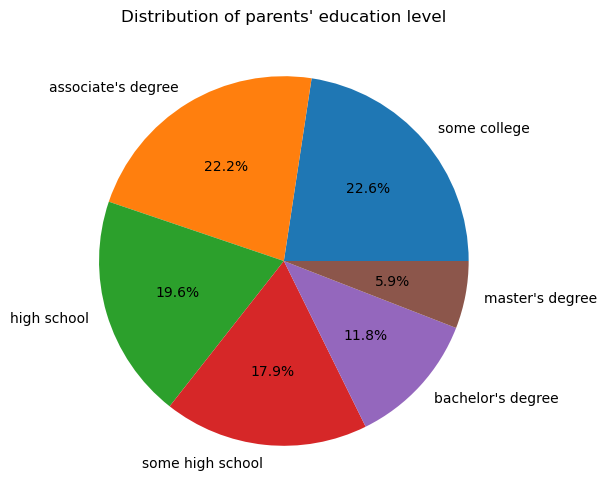

In [7]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    plt.figure(figsize=(10, 6))
    data['parental level of education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title("Distribution of parents' education level")
    plt.ylabel('')
    plt.show()

### Вывод: у большинства студентов родители учились в колледжах или имеют диплом об окончании колледжа. Студенты, у которых родители со средним образованием, также имеют заметное присутствие, но в меньшей степени по сравнению с предыдущими двумя категориями. В то же время диплом бакалавра или магистра у родителей студентов имеет самую низкую частоту

# 4. Average scres of parent's education level

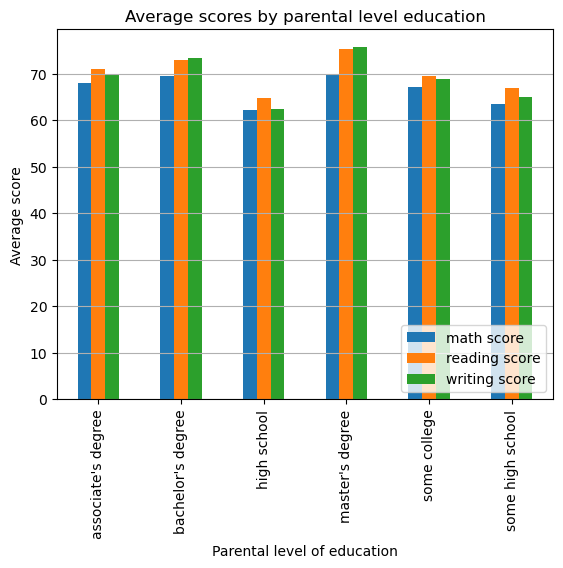

In [8]:
if not is_file_correct or not is_cell_values_correct:
    print("ERROR: plot can't be made")
else:
    gender_scores = data.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
    gender_scores.plot(kind='bar')
    plt.xlabel('Parental level of education')
    plt.ylabel('Average score')
    plt.title('Average scores by parental level education')
    plt.grid(True, axis='y')
    plt.legend(loc='lower right')
    plt.show()

### Вывод: у студентов, чьи родители имеют диплом магистра и бакалавра, средний балл по предметам выше